#                      Case Study on Testing of Hypothesis

#### A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it.
1. The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing. 
2. The company needs to check whether there is any dependency between the
features “Region” and “Manager"

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
data = pd.read_csv("Sales_add.csv")
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


### Understanding the data

In [3]:
data.shape

(22, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
# checking for null values
data.isna().sum() 

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [6]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [7]:
data.describe(include=['object'])

,Month,Region,Manager
count,22,22,22
unique,22,3,3
top,Month-5,Region - A,Manager - A
freq,1,10,9


#### Inference
 1. Dataset contains a total of 22 entries.
 2. Dataset contains datatype "int64" denotes numerical data and "object" denotes categorical data.
 3. Dataset contains no null values.
 4. The sales after stepping into digital marketing on average, is more than the sales before stepping into digital   marketing.

## 1. To clarify whether there is any increase in sales after stepping into digital marketing.

Text(0.5, 1.02, 'Sales before & after Digital Marketing')

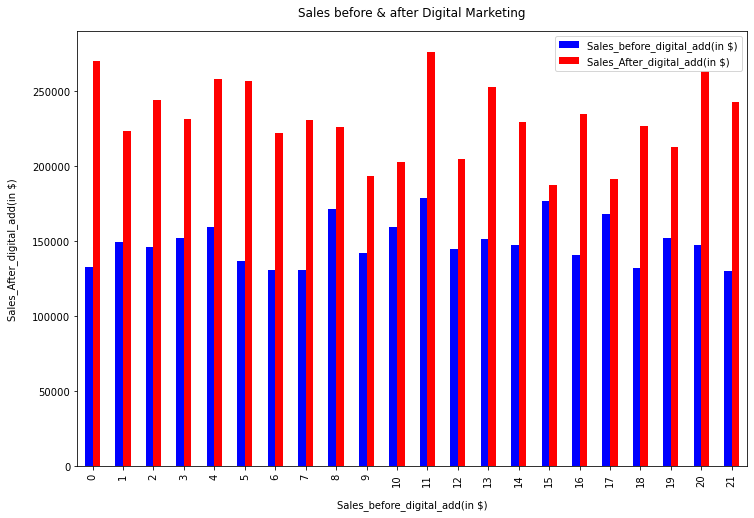

In [15]:
graph=data.plot(kind='bar',color=['blue','red'],figsize=(12,8))
plt.xlabel("Sales_before_digital_add(in $)", labelpad=14)
plt.ylabel("Sales_After_digital_add(in $)", labelpad=14)
plt.title("Sales before & after Digital Marketing", y=1.02)

###  H0 : There is no increase in sales after stepping into digital marketing.
###  H1 : There is  increase in sales after stepping into digital marketing.

In [8]:
from scipy import stats
from scipy.stats import ttest_ind
Sales_before = data["Sales_before_digital_add(in $)"]
Sales_After = data["Sales_After_digital_add(in $)"]
ttest,pval = stats.ttest_ind(Sales_before,Sales_After)
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e.There is increase in sales after stepping into digital marketing.")
else:
  print("We accept null hypothesis i.e.There is increase in sales after stepping into digital marketing.")

p-value 2.614368006904645e-16
We reject null hypothesis i.e.There is increase in sales after stepping into digital marketing.


## Result
#### There is increase in sales after stepping into digital marketing.

## 2. To check whether there is any dependency between the features “Region” and “Manager".

### H0 : There is no association between the features "Region" and "Manager".
### H1 : There is  association between the features "Region" and "Manager".

In [9]:
feature1 = data['Region']
feature2 = data['Manager']

In [10]:
# to get the counts
crossTable = pd.crosstab(feature1,feature2) 
crossTable

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [11]:
from scipy.stats import chi2_contingency

In [12]:
chiVal,pVal,df,exp = chi2_contingency(crossTable)
chiVal,pVal,df,exp                                            

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [13]:
print("p-value:",pVal)
if pVal <0.05:
    print("we reject null hypothesis i.e.There is assosciation between the features Region and Manager.")
else:
    print("We accept null hypothesis i.e.There is no association between the features Region and Manager.")

p-value: 0.5493991051158094
We accept null hypothesis i.e.There is no association between the features Region and Manager.


## Result
####   There is no association between the features "region" and "Manager".
      1. Variables are independent(Fail to reject H0)
      2. There is no dependency between the features "Region" and " Manager".